In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

##     <p style="font-size:280%;">  Çok Değişkenli Regresyon </p>

##     <p style="font-size:180%;">  Çok Değişken (Nitelik) </p>

In [3]:
eğitim_verisi=pd.read_csv("data/train.csv")

In [4]:
# Konut fiyatları için eğitim seti

eğitim_verisi.rename(columns={"Fireplaces":"Şömine_Adedi(x4)","YearBuilt":"Yapılma_Tarihi(x3)","GarageArea":"Garaj_Boyutu(x2)","LotArea":"Konut_Boyutu(x1)","SalePrice":"Konut_Fiyat(y)"},inplace=True)

eğitim_verisi=eğitim_verisi[["Konut_Boyutu(x1)","Garaj_Boyutu(x2)","Yapılma_Tarihi(x3)","Şömine_Adedi(x4)" ,"Konut_Fiyat(y)"]] 

In [5]:
eğitim_verisi.head(2)

,Konut_Boyutu(x1),Garaj_Boyutu(x2),Yapılma_Tarihi(x3),Şömine_Adedi(x4),Konut_Fiyat(y)
0,8450,548,2003,0,208500
1,9600,460,1976,1,181500


### Notasyon



**m** : Eğitim verisindeki örnek adedi
 
**x**: Girdi değişkenleri
 
**y**: Çıktı değişkeni

**$\theta$**: Katsayı ,Ağırlık 

**h**: Hipotez

**(x, y)** – eğitim verisi

 



 <p style="font-size:150%;"> * Yeni notasyonlar :  </p> 
<p style="font-size:150%;"> $n$ : Nitelik adedi  </p> 
 <p style="font-size:150%;"> $x^i$ : i. eğitim verisi için girdi değişkenleri (nitelikleri)  </p> 
    <p style="font-size:150%;"> $x_j^i$ : i. eğitim verisi için j. değişkenin değeri </p> 

 
<p style="font-size:200%;"> Hipotez :  $ h_0(x)=  \theta_0 + \theta_1*x $  ->   Artık Değil!    </p> 
 

 
<p style="font-size:200%;"> Artık  :   $ h_0(x)=  \theta_0 + \theta_1*x_1+  \theta_2*x_2  + \theta_3*x_3 +...+  \theta_n*x_n $  </p> 
 

In [6]:
y=eğitim_verisi[["Konut_Fiyat(y)"]]

In [7]:
nitelik_listesi=eğitim_verisi.columns.tolist();nitelik_listesi.remove("Konut_Fiyat(y)");nitelik_listesi

['Konut_Boyutu(x1)',
 'Garaj_Boyutu(x2)',
 'Yapılma_Tarihi(x3)',
 'Şömine_Adedi(x4)']

In [8]:
x=eğitim_verisi[nitelik_listesi];x.head(2)

,Konut_Boyutu(x1),Garaj_Boyutu(x2),Yapılma_Tarihi(x3),Şömine_Adedi(x4)
0,8450,548,2003,0
1,9600,460,1976,1


In [9]:
x.loc[0]

Konut_Boyutu(x1)      8450
Garaj_Boyutu(x2)       548
Yapılma_Tarihi(x3)    2003
Şömine_Adedi(x4)         0
Name: 0, dtype: int64

In [10]:
theta0=50000;theta1=10;theta2=1.2;theta3=0.1;theta4=0.2
theta=pd.DataFrame([theta0,theta1,theta2,theta3,theta4],columns=["Katsayılar"])

In [11]:
theta

,Katsayılar
0,50000.0
1,10.0
2,1.2
3,0.1
4,0.2


In [12]:
x0=[1]*x.shape[0]

In [13]:
x["Yanlılık(x0)"]=x0
girdi_listesi=x.columns.tolist();girdi_listesi.remove("Yanlılık(x0)");girdi_listesi.insert(0,"Yanlılık(x0)")

In [14]:
girdi_listesi

['Yanlılık(x0)',
 'Konut_Boyutu(x1)',
 'Garaj_Boyutu(x2)',
 'Yapılma_Tarihi(x3)',
 'Şömine_Adedi(x4)']

In [15]:
x = x.reindex(columns=girdi_listesi)

In [16]:
def girdi(x):
    x_new=x.copy()
    x0=[1]*x_new.shape[0]
    x_new["Yanlılık(x0)"]=x0
    girdi_listesi=x_new.columns.tolist()
    girdi_listesi.remove("Yanlılık(x0)")
    girdi_listesi.insert(0,"Yanlılık(x0)")
    x_new = x_new.reindex(columns=girdi_listesi)
    return x_new

In [17]:
girdi(eğitim_verisi[nitelik_listesi]).head(2)

,Yanlılık(x0),Konut_Boyutu(x1),Garaj_Boyutu(x2),Yapılma_Tarihi(x3),Şömine_Adedi(x4)
0,1,8450,548,2003,0
1,1,9600,460,1976,1


In [18]:
h=pd.DataFrame(np.dot(x,theta),columns=["Tahmin(h)"])

In [19]:
def tahmin(x,theta):
    h=pd.DataFrame(np.dot(x,theta),columns=["Tahmin(h)"])
    return h

In [20]:
tahmin(x,theta).head(2)

,Tahmin(h)
0,135357.9
1,146749.8


In [21]:
y.head(2)

,Konut_Fiyat(y)
0,208500
1,181500


<br>
<p style="font-size:150%;"> $Bedel(J_{\theta})$:$  \begin{equation}\ 1/2m \sum_{i=1}^m (h_{\theta}(x^{(i)})-y^{(i)}))^2 \end{equation}  $ </p> 
<br>

In [22]:
m=y.shape[0]
j=(1/(2*m))*np.sum(np.array(np.square(np.dot(x,theta)-y))) 

In [23]:
print("Bedel değeri:",j)

Bedel değeri: 6344618856.149989


In [24]:
def bedel(X,y,theta):
    
    m=y.shape[0]
    j=(1/(2*m))*np.sum(np.array(np.square(np.dot(X,theta)-y)))    
    
    return j




In [25]:
print("Fonksiyon ile Bedel değeri:",bedel(x,y,theta))

Fonksiyon ile Bedel değeri: 6344618856.149989


<br>
<p style="font-size:200%;"> $Artık(r^{(i)})=  \begin{equation}\   h_{\theta}(x^{(i)})-y^{(i)}   \end{equation}  $ </p> 
<br>

In [26]:
r=pd.DataFrame((np.array(h)-np.array(y)),columns=["Artık(r)"]);r.head(2)


,Artık(r)
0,-73142.1
1,-34750.2


In [27]:
def artık(h,y):
    r=pd.DataFrame((np.array(h)-np.array(y)),columns=["Artık(r)"])
    return r

In [28]:
artık(h,y).head(2)

,Artık(r)
0,-73142.1
1,-34750.2


<br>
<p style="font-size:150%;"> $Dereceli(g)\ \ Azalım:$</p>

<p style="font-size:150%;"> Tekrarla: {  \begin{equation}\     \theta_j := \theta_j-a*\frac{\partial J(\theta_0,\theta_1,...\theta_n)}{\partial \theta_j} \end{equation} }</p>

<p style="font-size:150%;">
 Anlık olarak her j=0,...,n için hesaplanır.</p>
<br>

<p style="font-size:150%;">\begin{equation}\     \theta_j := \theta_j-a*1/m \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)}))*x^{(i)}  \end{equation}</p>

 <p style="font-size:150%;">$ \theta_0 \   için \ x^{(i)}=1' dir$ </p> 

<p style="font-size:150%;"> Bu yüzden $\theta_0$ iken derece alçalma fonksiyonu : </p> 

<p style="font-size:120%;">\begin{equation}\ \theta_0->     \theta_0 := \theta_0-a*1/m \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)}))  \end{equation}</p>

<p style="font-size:120%;">\begin{equation}\ \theta_1->     \theta_1 := \theta_1-a*1/m \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)}))*x_1^{(i)}  \end{equation}</p>

<p style="font-size:120%;">\begin{equation}\ \theta_2->     \theta_2 := \theta_2-a*1/m \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)}))*x_2^{(i)}  \end{equation}</p>

<p style="font-size:110%;">$ Öğrenme Hızı : a$</p> <br>

In [29]:
a=0.1

In [30]:
theta0= theta0 - a*(1/m)*np.sum(np.array(h)-np.array(y))

In [31]:
theta0

52498.808952054795

In [32]:
theta1=theta1 - a*(1/m)*np.sum(np.multiply((np.array(h)-np.array(y)), x.iloc[:,1].values))

In [33]:
theta1

38368134482.14304

In [34]:
theta2=theta2 - a*(1/m)*np.sum(np.multiply((np.array(h)-np.array(y)), x.iloc[:,2].values))

In [35]:
theta2

1725555021.8503902

###  <p style="font-size:180%;">   Nitelik Normalleştirme </p>

<p style="font-size:150%;"> Benzer ölçekteki veriler ile çalışmanın bize faydaları olacaktır. Neden ? </p>

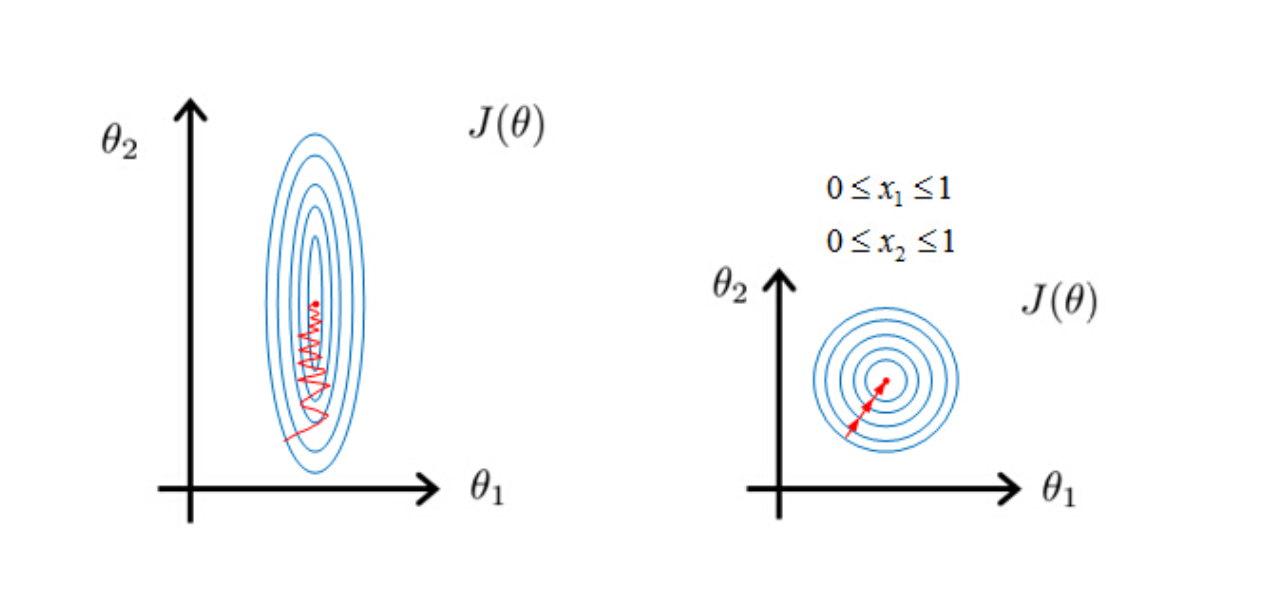

In [36]:
x1=eğitim_verisi["Konut_Boyutu(x1)"]

In [37]:
x2=eğitim_verisi["Şömine_Adedi(x4)"] #  Not1 :Aradaki farkın daha iyi gösterilmesi için  "Şömine_Adedi(x4)" x2 olarak kullanılmıştır

In [38]:
print("X1 in minumum değeri" , x1.min(),"ve maksimum değeri" , x1.max())

X1 in minumum değeri 1300 ve maksimum değeri 215245


In [39]:
print("X2 in minumum değeri" , x2.min(),"ve maksimum değeri" , x2.max())

X2 in minumum değeri 0 ve maksimum değeri 3


 
<p style="font-size:120%;"> Nitelikleri benzer ölçeğe getireceğiz. Olmasını istediğimiz aralık  :  $ -1< x_i < 1 $ gibi olabilir. </p>

####  <p style="font-size:180%;">   Ortalama ile Normalleştirme </p>

 

 <p style="font-size:180%;">\begin{equation}\ x_i =   \ \frac{  x_i -\mu_i }{  S_i} \end{equation}</p>


<p style="font-size:120%;"> * Notasyonlar :  </p> 
 
 <p style="font-size:120%;"> $x_i$ : Nitelik (Girdi) Değeri </p> 
    <p style="font-size:120%;"> $\mu_i$ : $x_i$'nin Ortalaması </p> 
        <p style="font-size:120%;"> $S_i$ : $x_i$'nin Standart Sapması veya Maksimum Minumum Farkı </p> 

In [40]:
x1_normal=(x1-x1.mean())/x1.std()

In [41]:
x1_normal.loc[:2]

0   -0.207071
1   -0.091855
2    0.073455
Name: Konut_Boyutu(x1), dtype: float64

In [42]:
print("X1_normal in minumum değeri" , x1_normal.min(),"ve maksimum değeri" , x1_normal.max())

X1_normal in minumum değeri -0.923412828397377 ve maksimum değeri 20.511245148264887


In [43]:
x2_normal=(x2-x2.mean())/x2.std()

In [44]:
x2_normal.loc[:2]

0   -0.950901
1    0.600289
2    0.600289
Name: Şömine_Adedi(x4), dtype: float64

In [45]:
print("X2_normal in minumum değeri" , x2_normal.min(),"ve maksimum değeri" , x2_normal.max())

X2_normal in minumum değeri -0.9509006699369511 ve maksimum değeri 3.7026690890841056


In [46]:
def normalizasyon(X):
    X_norm=pd.DataFrame(np.matrix(x)*0,columns=X.columns.tolist())
    
    for i in X.columns:
        if X[i].std()==0:
            X_norm[i]=1
        else:
            X_norm[i]=(X[i]-X[i].mean())/(X[i].std())
    return  X_norm 

In [47]:
normalizasyon(eğitim_verisi).head(2)

,Konut_Boyutu(x1),Garaj_Boyutu(x2),Yapılma_Tarihi(x3),Şömine_Adedi(x4),Konut_Fiyat(y)
0,-0.207071,0.35088,1.050634,-0.950901,0.347154
1,-0.091855,-0.06071,0.156680,0.600289,0.007286


In [48]:
normalizasyon(x).head(2)

,Yanlılık(x0),Konut_Boyutu(x1),Garaj_Boyutu(x2),Yapılma_Tarihi(x3),Şömine_Adedi(x4)
0,1,-0.207071,0.35088,1.050634,-0.950901
1,1,-0.091855,-0.06071,0.156680,0.600289


###  <p style="font-size:180%;">  Dereceli  Azaltma</p>

<p style="font-size:150%;">   \begin{equation}\     \theta_j := \theta_j-a*\frac{\partial J(\theta_0,\theta_1,...\theta_n)}{\partial \theta_j} \end{equation} </p>

 
<p style="font-size:120%;">   * Dereceli Azaltmanın doğru çalıştığından emin olmalıyız.  </p>
 
<p style="font-size:120%;">   *
 Öğrenme hızını nasıl seçeceğiz ? </p> 

In [49]:
# Tekrar sayısı : TS

def dereceli_azaltma(x, y, theta, a=0.1,TS=10 ):
    
    x_m=np.array(x) # X,y ve thetayı işlem kolaylığı için matrix haline getiriyoruz. 
    
    y_m=np.array(y)
    
   
    m=y.shape[0] # Eğitim verisindeki örnek adedi ( boyut i, satırlar)
    
    n=x.shape[1] # Nitelik adedi   ( boyut j, sütünlar)
    
    J_history=[] # Oluşan Bedelleri burada toplayacağız 
    J_history.append(bedel(x,y,theta))
    for s in range(TS):
        theta_m=np.array(theta)
        theta_s=theta_m
        for j in range(n):
            
            derece_= np.sum(np.multiply(np.array(np.array(x_m.dot(theta_m)-y_m)).T,x_m[:,j]))/m # Önce dereceyi hesaplıyoruz. 
            theta_s[j]=theta_m[j]-a*derece_ # Sonra onu katsayıdan öğrenme hızıyla çarpıp çıkartıyoruz
            
        theta[theta.columns[0]]=theta_s # Bütün katsayıları bir anda güncelliyoruz.
        
        J_history.append(bedel(x,y,theta)) # Bedel fonskiyonu ile her bir denemedeki bedeli hesaplıyoruz.
    
    return  theta_m, J_history  

In [50]:
theta0=50000;theta1=10;theta2=1.2;theta3=0.1;theta4=0.2
theta=pd.DataFrame([theta0,theta1,theta2,theta3,theta4],columns=["Katsayılar"])

In [51]:
t,j=dereceli_azaltma(x, y, theta, a=np.power(1/10,9),TS=50000 )

In [52]:
t # Yeni katsayılar

array([[4.99999861e+04],
       [1.31261024e+00],
       [1.91285756e+02],
       [1.37435857e+01],
       [1.00377487e+00]])

In [53]:
j[:5] # Bedelin değişimi , azalmasını istiyoruz

[6344618856.149989,
 6094526724.305228,
 5934708406.068296,
 5831017864.815525,
 5762237872.772985]

In [54]:
bedel_df=pd.DataFrame(columns=["Bedel"])

In [55]:
bedel_df["Bedel"]=j;bedel_df.reset_index(inplace=True)

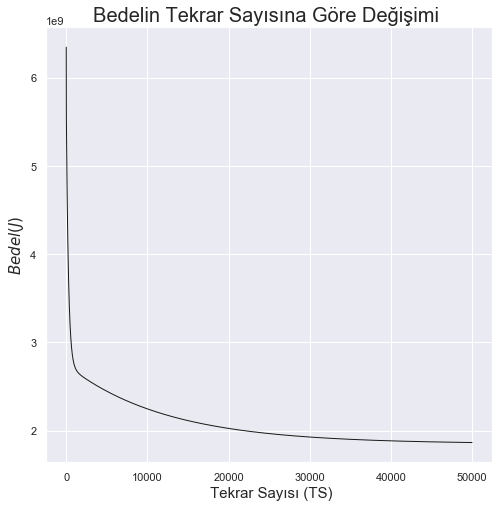

In [56]:
plt.figure(figsize=(8,8))
plt.title("Bedelin Tekrar Sayısına Göre Değişimi ",fontsize="20")
plt.ylabel("$Bedel(J) $",fontsize=15)
plt.xlabel(" Tekrar Sayısı (TS)",fontsize=15)
plt.plot(bedel_df["index"],bedel_df["Bedel"], 'k-',linewidth=1,markersize=18)
plt.show()

In [57]:
# Öğrenme Hızını Biraz Büyük Seciyoruz a = np.power(1/10,3)

theta0=50000;theta1=10;theta2=1.2;theta3=0.1;theta4=0.2
theta=pd.DataFrame([theta0,theta1,theta2,theta3,theta4],columns=["Katsayılar"])
a=np.power(1/10,3)
t,j=dereceli_azaltma(x, y, theta, a=a,TS=5000 )
print("Katsayılar" , t)
print("Bedelin ilk 10 tekrardaki değişimi", j[:10])
bedel_df=pd.DataFrame(columns=["Bedel"])
bedel_df["Bedel"]=j;bedel_df.reset_index(inplace=True)

C:\Users\onur.bilgic\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.
C:\Users\onur.bilgic\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\onur.bilgic\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in multiply


Katsayılar [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Bedelin ilk 10 tekrardaki değişimi [6344618856.149989, 1.330508058229625e+31, 1.4208276556017448e+53, 1.5172784670886815e+75, 1.6202767011288119e+97, 1.730266819945204e+119, 1.8477234574301746e+141, 1.973153467305024e+163, 2.1070981103160947e+185, 2.2501353899054378e+207]


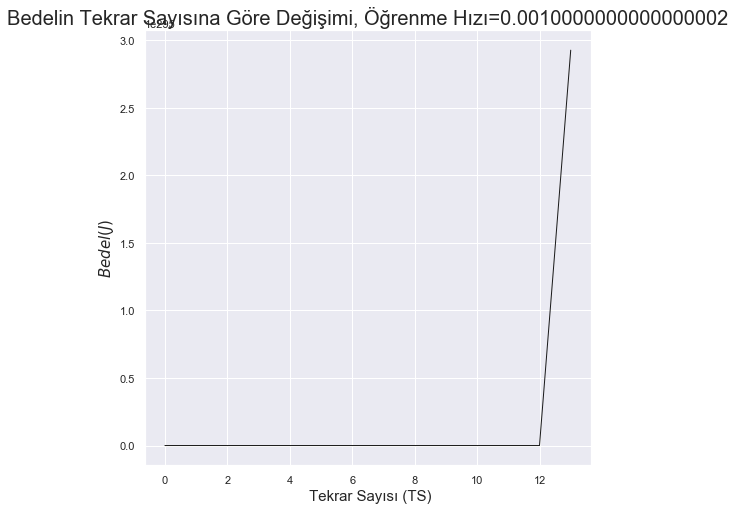

In [58]:
plt.figure(figsize=(8,8))
title="Bedelin Tekrar Sayısına Göre Değişimi, Öğrenme Hızı="+str(a)
plt.title(title,fontsize="20")
plt.ylabel("$Bedel(J) $",fontsize=15)
plt.xlabel(" Tekrar Sayısı (TS)",fontsize=15)
plt.plot(bedel_df["index"],bedel_df["Bedel"], 'k-',linewidth=1,markersize=18)
plt.show()

In [59]:
# Öğrenme Hızını Biraz Azaltalım z a = np.power(1/10,6)

theta0=50000;theta1=10;theta2=1.2;theta3=0.1;theta4=0.2
theta=pd.DataFrame([theta0,theta1,theta2,theta3,theta4],columns=["Katsayılar"])
a=np.power(1/10,6)
t,j=dereceli_azaltma(x, y, theta, a=a,TS=5000 )
print("Katsayılar" , t)
print("Bedelin ilk 10 tekrardaki değişimi", j[:10])
bedel_df=pd.DataFrame(columns=["Bedel"])
bedel_df["Bedel"]=j;bedel_df.reset_index(inplace=True)


C:\Users\onur.bilgic\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


Katsayılar [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Bedelin ilk 10 tekrardaki değişimi [6344618856.149989, 86278584857807.95, 1.819000104513586e+18, 3.5726527485569275e+22, 7.005452599286762e+26, 1.3736140860687207e+31, 2.693350493837536e+35, 5.281058776251872e+39, 1.0354976765040637e+44, 2.0303796709363084e+48]


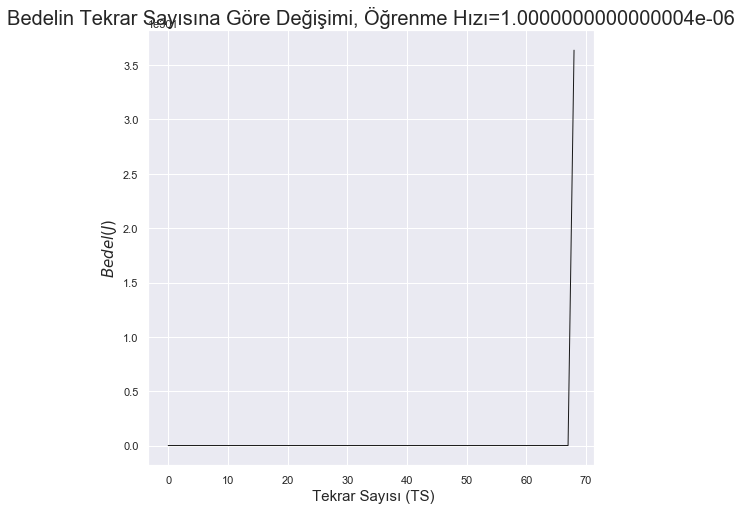

In [60]:
plt.figure(figsize=(8,8))
title="Bedelin Tekrar Sayısına Göre Değişimi, Öğrenme Hızı="+str(a)
plt.title(title,fontsize="20")
plt.ylabel("$Bedel(J) $",fontsize=15)
plt.xlabel(" Tekrar Sayısı (TS)",fontsize=15)
plt.plot(bedel_df["index"],bedel_df["Bedel"], 'k-',linewidth=1,markersize=18)
plt.show()


<br>
<p style="font-size:120%;">  Öğrenme hızını çok seçersek bedel azalmak yerine artar ve öğrenme gerçekleşmez.   </p><br>
<br>

In [61]:
# İdeal bir Öğrenme Hızı seçtiğimizde 

theta0=50000;theta1=10;theta2=1.2;theta3=0.1;theta4=0.2
theta=pd.DataFrame([theta0,theta1,theta2,theta3,theta4],columns=["Katsayılar"])
a=np.power(1/10,9)
t,j=dereceli_azaltma(x, y, theta, a=a,TS=5000 )
print("Katsayılar" , t)
print("Bedelin ilk 10 tekrardaki değişimi", j[:10])
bedel_df=pd.DataFrame(columns=["Bedel"])
bedel_df["Bedel"]=j;bedel_df.reset_index(inplace=True)


Katsayılar [[5.00000201e+04]
 [1.76284967e+00]
 [5.11210936e+01]
 [4.54058043e+01]
 [3.04231352e-01]]
Bedelin ilk 10 tekrardaki değişimi [6344618856.149989, 6094526724.305228, 5934708406.068296, 5831017864.815525, 5762237872.772985, 5715183224.824807, 5681658928.732279, 5656570610.720949, 5636750632.156979, 5620228789.359401]


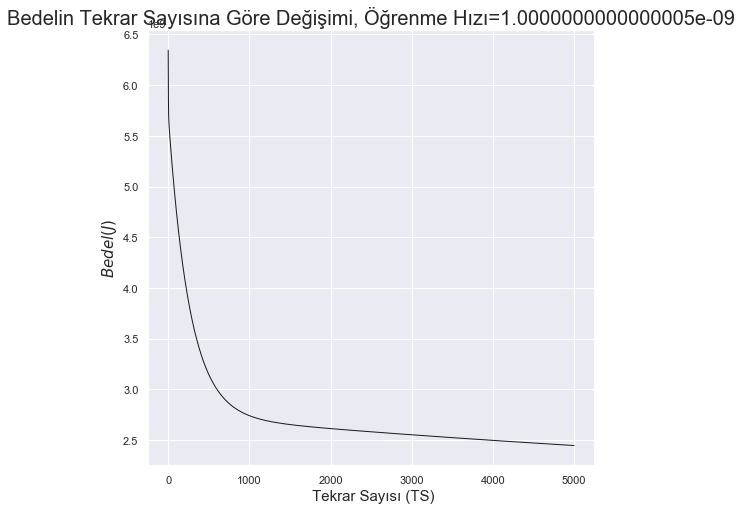

In [62]:
plt.figure(figsize=(8,8))
title="Bedelin Tekrar Sayısına Göre Değişimi, Öğrenme Hızı="+str(a)
plt.title(title,fontsize="20")
plt.ylabel("$Bedel(J) $",fontsize=15)
plt.xlabel(" Tekrar Sayısı (TS)",fontsize=15)
plt.plot(bedel_df["index"],bedel_df["Bedel"], 'k-',linewidth=1,markersize=18)
plt.show()

In [63]:
# Öğrenme hızını daha  az seçiyoruz.

theta0=50000;theta1=10;theta2=1.2;theta3=0.1;theta4=0.2
theta=pd.DataFrame([theta0,theta1,theta2,theta3,theta4],columns=["Katsayılar"])
a=np.power(1/10,12)
t,j=dereceli_azaltma(x, y, theta, a=a,TS=5000 )
print("Katsayılar" , t)
print("Bedelin ilk 10 tekrardaki değişimi", j[:10])
bedel_df=pd.DataFrame(columns=["Bedel"])
bedel_df["Bedel"]=j;bedel_df.reset_index(inplace=True)


Katsayılar [[5.00000002e+04]
 [8.36450009e+00]
 [1.31726334e+00]
 [4.47991413e-01]
 [2.00146670e-01]]
Bedelin ilk 10 tekrardaki değişimi [6344618856.149989, 6344341237.177733, 6344063731.289544, 6343786338.437417, 6343509058.573365, 6343231891.649422, 6342954837.617646, 6342677896.430109, 6342401068.038909, 6342124352.396161]


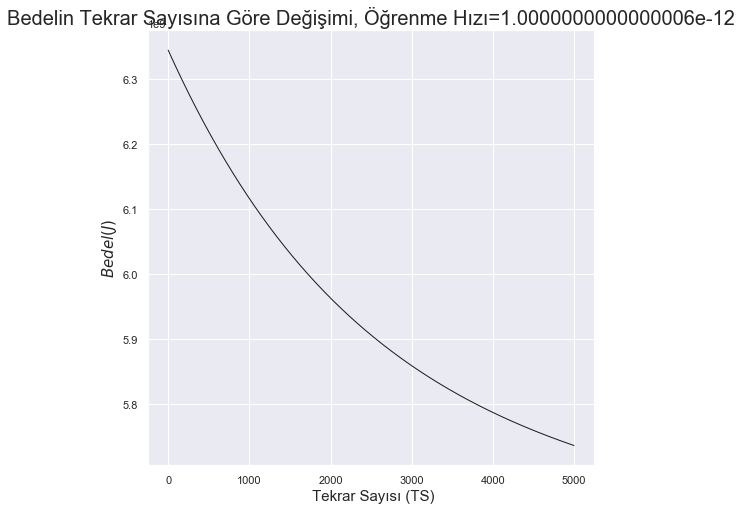

In [64]:
plt.figure(figsize=(8,8))
title="Bedelin Tekrar Sayısına Göre Değişimi, Öğrenme Hızı="+str(a)
plt.title(title,fontsize="20")
plt.ylabel("$Bedel(J) $",fontsize=15)
plt.xlabel(" Tekrar Sayısı (TS)",fontsize=15)
plt.plot(bedel_df["index"],bedel_df["Bedel"], 'k-',linewidth=1,markersize=18)
plt.show()


<br>
<p style="font-size:120%;">  Öğrenme hızını az seçersek bedeli azaltmamız uzun sürer. Çok fazla tekrar yapmamız gerekir.  </p><br>
<br>

###  <p style="font-size:100%;">  Nitelikler ve Polinom Regresyon</p>


<p style="font-size:100%;">\begin{equation}\  h\theta(x) =  \theta_0 + \theta_1*x_1(BinanınEni) + \theta_2*x_2(BinanınDerinliği) \end{equation}</p>



<p style="font-size:100%;">\begin{equation}\ x =   x_1(BinanınEni) *x_2(BinanınDerinliği) \end{equation}</p>



<p style="font-size:100%;">\begin{equation}\  h\theta(x) =  \theta_0 + \theta_1*x(BinanınBoyutu ) \end{equation}</p>


![image.png](dogrusalresim/ev.png)

In [65]:
BinaEni=[10,12,13,12,14,12,13]
BinaDerinliği=[10,11,13,17,16,13,11]
Konut_Fiyat=[200,300,400,500,600,390,350]


In [66]:
y=pd.DataFrame(Konut_Fiyat,columns=["Konut_Fiyat(y)"]);y.head(2)

,Konut_Fiyat(y)
0,200
1,300


In [67]:
x=pd.DataFrame(BinaEni,columns=["BinaEni(x1)"])
x["BinaDerinliği(x2)"]=BinaDerinliği;x.head(3)

,BinaEni(x1),BinaDerinliği(x2)
0,10,10
1,12,11
2,13,13


In [68]:
x["BinaBoyutu(x3)"]=x["BinaEni(x1)"]*x["BinaDerinliği(x2)"];x.head(2)

,BinaEni(x1),BinaDerinliği(x2),BinaBoyutu(x3)
0,10,10,100
1,12,11,132


In [69]:
x["BinaEni^2(x4)"]=x["BinaEni(x1)"]**2


In [70]:
x["BinaDerinliği^2(x5)"]=x["BinaDerinliği(x2)"]**2

In [71]:
x["BinaBoyutu^3(x6)"]=x["BinaBoyutu(x3)"]**3

In [72]:
eğitim_verisi=pd.concat([x,y.reindex(x.index)], axis=1)

In [73]:
eğitim_verisi.head(2)

,BinaEni(x1),BinaDerinliği(x2),BinaBoyutu(x3),BinaEni^2(x4),BinaDerinliği^2(x5),BinaBoyutu^3(x6),Konut_Fiyat(y)
0,10,10,100,100,100,1000000,200
1,12,11,132,144,121,2299968,300


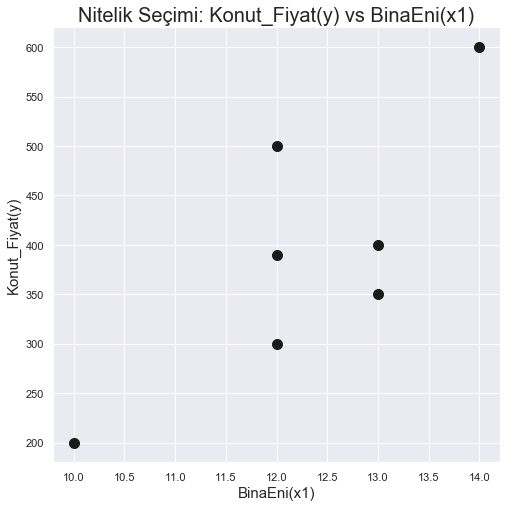

In [74]:
plt.figure(figsize=(8,8))
title="Nitelik Seçimi: Konut_Fiyat(y) vs BinaEni(x1)"
plt.title(title,fontsize= 20)
plt.ylabel("Konut_Fiyat(y)",fontsize=15)
plt.xlabel("BinaEni(x1)",fontsize=15)
plt.plot(x["BinaEni(x1)"],eğitim_verisi["Konut_Fiyat(y)"], 'ko',linewidth=1,markersize=10)
plt.show()

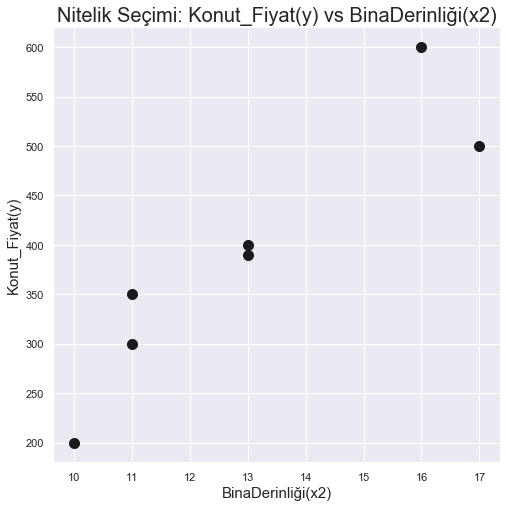

In [75]:
plt.figure(figsize=(8,8))
title="Nitelik Seçimi: Konut_Fiyat(y) vs BinaDerinliği(x2)"
plt.title(title,fontsize= 20)
plt.ylabel("Konut_Fiyat(y)",fontsize=15)
plt.xlabel("BinaDerinliği(x2)",fontsize=15)
plt.plot(x["BinaDerinliği(x2)"],eğitim_verisi["Konut_Fiyat(y)"], 'ko',linewidth=1,markersize=10)
plt.show()

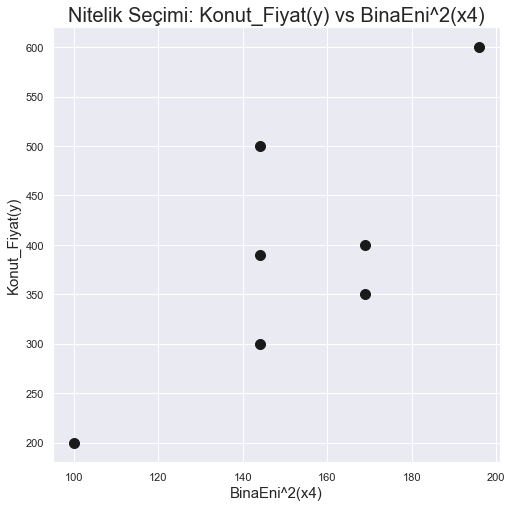

In [76]:
plt.figure(figsize=(8,8))
title="Nitelik Seçimi: Konut_Fiyat(y) vs BinaEni^2(x4)"
plt.title(title,fontsize= 20)
plt.ylabel("Konut_Fiyat(y)",fontsize=15)
plt.xlabel("BinaEni^2(x4)",fontsize=15)
plt.plot(x["BinaEni^2(x4)"],eğitim_verisi["Konut_Fiyat(y)"], 'ko',linewidth=1,markersize=10)
plt.show()

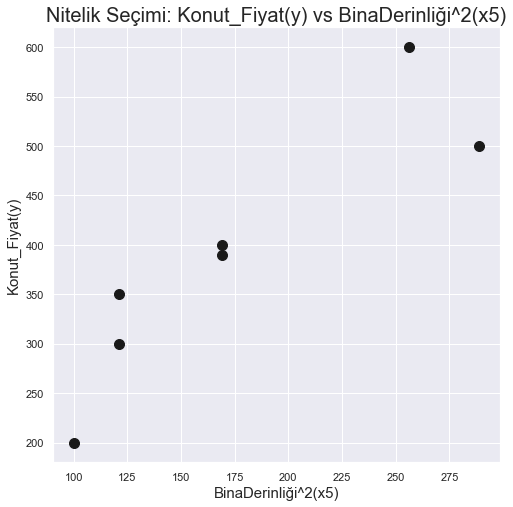

In [77]:
plt.figure(figsize=(8,8))
title="Nitelik Seçimi: Konut_Fiyat(y) vs BinaDerinliği^2(x5)"
plt.title(title,fontsize= 20)
plt.ylabel("Konut_Fiyat(y)",fontsize=15)
plt.xlabel("BinaDerinliği^2(x5)",fontsize=15)
plt.plot(x["BinaDerinliği^2(x5)"],eğitim_verisi["Konut_Fiyat(y)"], 'ko',linewidth=1,markersize=10)
plt.show()

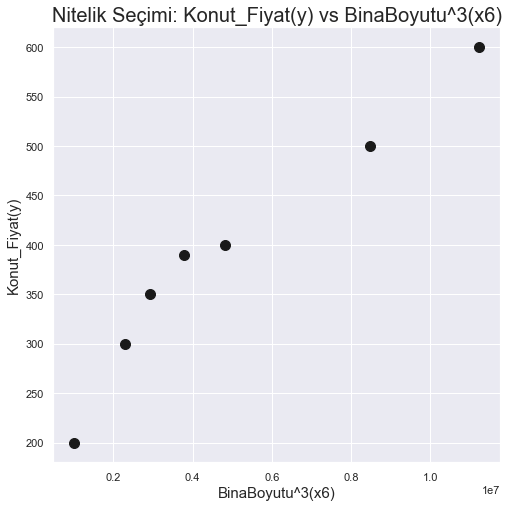

In [78]:
plt.figure(figsize=(8,8))
title="Nitelik Seçimi: Konut_Fiyat(y) vs BinaBoyutu^3(x6)"
plt.title(title,fontsize= 20)
plt.ylabel("Konut_Fiyat(y)",fontsize=15)
plt.xlabel("BinaBoyutu^3(x6)",fontsize=15)
plt.plot(x["BinaBoyutu^3(x6)"],eğitim_verisi["Konut_Fiyat(y)"], 'ko',linewidth=1,markersize=10)
plt.show()

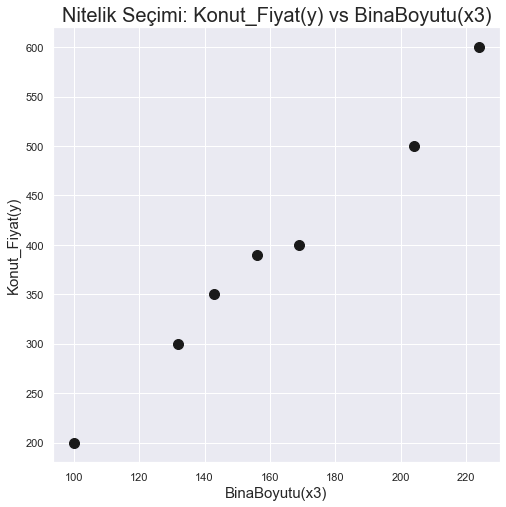

In [79]:
plt.figure(figsize=(8,8))
title="Nitelik Seçimi: Konut_Fiyat(y) vs BinaBoyutu(x3)"
plt.title(title,fontsize= 20)
plt.ylabel("Konut_Fiyat(y)",fontsize=15)
plt.xlabel("BinaBoyutu(x3)",fontsize=15)
plt.plot(x["BinaBoyutu(x3)"],eğitim_verisi["Konut_Fiyat(y)"], 'ko',linewidth=1,markersize=10)
plt.show()

 
<p style="font-size:120%;">  \begin{equation}\ Seçim : h\theta(x) =  \theta_0 + \theta_1*x(BinanınBoyutu ) \end{equation}</p>
 

###  <p style="font-size:180%;">  Normal Denklem Yoluyla Çözüm</p>


 
<p style="font-size:120%;">  Dereceli azaltma olmadan da regresyon katsayıları hesaplanabilir. Her bir katsayıyı tek tek bulmak yerine hepsini bir kere de bulabiliriz.  </p> 
 

<p style="font-size:120%;">   \begin{equation}\     \theta_j := \theta_j-a*\frac{\partial J(\theta_0,\theta_1,...\theta_n)}{\partial \theta_j} \end{equation} </p>

 
<p style="font-size:120%;">  İlk örneğimize dönelim </p> 

In [80]:
eğitim_verisi=pd.read_csv("data/train.csv")
# Konut fiyatları için eğitim seti
eğitim_verisi.rename(columns={"Fireplaces":"Şömine_Adedi(x4)","YearBuilt":"Yapılma_Tarihi(x3)","GarageArea":"Garaj_Boyutu(x2)","LotArea":"Konut_Boyutu(x1)","SalePrice":"Konut_Fiyat(y)"},inplace=True)
eğitim_verisi=eğitim_verisi[["Konut_Boyutu(x1)","Garaj_Boyutu(x2)","Yapılma_Tarihi(x3)","Şömine_Adedi(x4)" ,"Konut_Fiyat(y)"]] 
y=eğitim_verisi[["Konut_Fiyat(y)"]]
nitelik_listesi=eğitim_verisi.columns.tolist();nitelik_listesi.remove("Konut_Fiyat(y)");nitelik_listesi
x=eğitim_verisi[nitelik_listesi];x=girdi(x)

In [81]:
y.head(2)

,Konut_Fiyat(y)
0,208500
1,181500


In [82]:
x.head(2)

,Yanlılık(x0),Konut_Boyutu(x1),Garaj_Boyutu(x2),Yapılma_Tarihi(x3),Şömine_Adedi(x4)
0,1,8450,548,2003,0
1,1,9600,460,1976,1


<p style="font-size:150%;">   \begin{equation}\     \theta=(X^TX)^{-1}X^Ty   \end{equation} </p>

In [83]:
theta_yeni=np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y) # Yukarıdaki formul ile hesaplarsak 

In [84]:
bedel(x,y,theta_yeni)


1392901096.5439003

In [85]:
theta0=50000;theta1=10;theta2=1.2;theta3=0.1;theta4=0.2
theta=pd.DataFrame([theta0,theta1,theta2,theta3,theta4],columns=["Katsayılar"])
a=np.power(1/10,9)
t,j=dereceli_azaltma(x, y, theta, a=a,TS=100000 )
print("Katsayılar" , t)
print("Bedelin ilk 10 tekrardaki değişimi", j[:10])
bedel_df=pd.DataFrame(columns=["Bedel"])
bedel_df["Bedel"]=j;bedel_df.reset_index(inplace=True)


Katsayılar [[4.99999683e+04]
 [1.23854754e+00]
 [2.14359056e+02]
 [8.53072866e+00]
 [1.69313307e+00]]
Bedelin ilk 10 tekrardaki değişimi [6344618856.149989, 6094526724.305228, 5934708406.068296, 5831017864.815525, 5762237872.772985, 5715183224.824807, 5681658928.732279, 5656570610.720949, 5636750632.156979, 5620228789.359401]


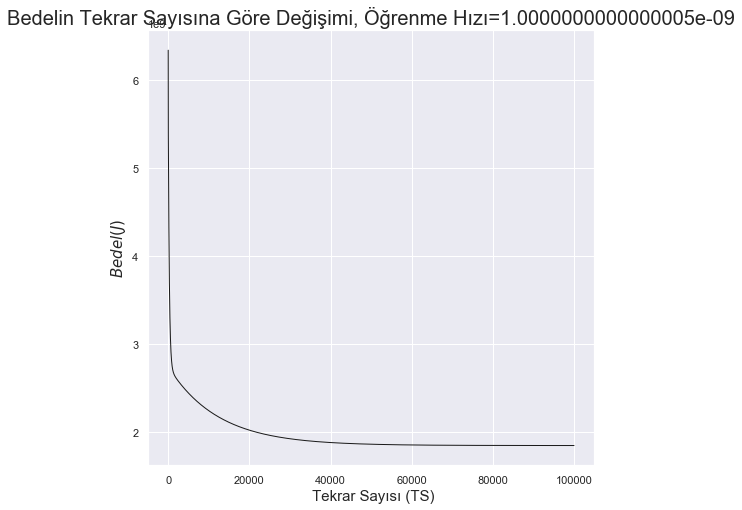

In [86]:
plt.figure(figsize=(8,8))
title="Bedelin Tekrar Sayısına Göre Değişimi, Öğrenme Hızı="+str(a)
plt.title(title,fontsize="20")
plt.ylabel("$Bedel(J) $",fontsize=15)
plt.xlabel(" Tekrar Sayısı (TS)",fontsize=15)
plt.plot(bedel_df["index"],bedel_df["Bedel"], 'k-',linewidth=1,markersize=18)
plt.show()

 

<p style="font-size:120%;">    Normal Denklem Yolu ile Bedel 1392*10^6 / Dereceli Azaltma ile 100000 Tekrardan Sonra ise Bedel 1849*10^6  </p>
 

In [87]:
theta

,Katsayılar
0,49999.968275
1,1.238548
2,214.359056
3,8.530729
4,1.693133


In [88]:
theta_normal=pd.DataFrame(theta_yeni,columns=["Normal Denklem Katsayılar"]);theta_normal

,Normal Denklem Katsayılar
0,-1.444660e+06
1,8.891818e-01
2,1.427828e+02
3,7.745331e+02
4,3.569877e+04


 

<p style="font-size:180%;">    Dereceli Azaltma   </p>
<p style="font-size:100%;">    - Öğrenme Hızını iyi seçmek gerekir. </p>
<p style="font-size:100%;">    - Çok fazla tekrar gerektirir. </p>
<p style="font-size:100%;">    - Nitelik adedi(n) fazla bile olsa iyi çalışır </p>
 

 
<p style="font-size:180%;">    Normal Denklem   </p>
<p style="font-size:100%;">    - Öğrenme Hızını seçmeye gerek yoktur. </p>
<p style="font-size:100%;">    - Tekrar gerektirmez. </p>
<p style="font-size:100%;">    - $(X^TX)^{-1}$ hesaplayabilmek gerekir. Bazen inverse alınması mümkün olmuyor. </p>
<p style="font-size:100%;">    - Nitelik adedi(n) fazla ise yavaş çalışır.</p>
 

In [89]:
np.linalg.inv(np.dot(x,x.T))

LinAlgError: Singular matrix

 
<p style="font-size:100%;">    Eğer yukarıdaki gibi bir hata alıyorsak . Bu matriks'in tekil olduğunu gösterir. </p>
<p style="font-size:100%;">    Bu durumlarda yapılması gereken birbirine bağımlı olan girdilerin azaltılması veyahut düzenlileştirme (regularization) yapmaktır.  </p> 

In [90]:
print("Sorularınız ?")

Sorularınız ?


In [91]:
print("Teşekkürler...")

Teşekkürler...
